<a href="https://colab.research.google.com/github/Kraligan/Computer_Vision_Text_Detection/blob/main/Text_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


## Link google drive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Install requirements

In [ ]:
# EasyOCR
!pip install easyocr

# Tesseract
!apt install tesseract-ocr
!pip install pytesseract

## Import data

In [19]:
import cv2
import pytesseract
import easyocr
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import random

In [24]:
data_path_normal = "/content/gdrive/MyDrive/Computer vision/Projet detection text/data/normal_text/"
data_path_exotic = "/content/gdrive/MyDrive/Computer vision/Projet detection text/data/exotic_pictures/"
all_images_exotic = [f for f in os.listdir(data_path_exotic) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
all_images_normal = [f for f in os.listdir(data_path_normal) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(all_images_exotic)
# img = cv2.imread(all_images_exotic[0])
# plt.imshow(img)

['book_name_author_name.jpg', 'george_orwell_1984.jpg', 'a_dog_a_frog_and_a_flounder_kathryn_payne_olson.jpg', 'premade_series_book_I_the_lost_gods_trif_premade_www.trifnookdesign.com.jpg', 'aiden_thomas_author_of_cemetry_boys_lost_in_the_never_woods.jpg', 'dark_pines_will_dean_sometimes_silence_can_be_deafening.jpg', 'the_night_ocean_a_novel_paul_la_farge.jpg', 'knife_meditations_after_an_attempted_murder_salman_rushdie.jpg', 'the_antidote_is_it_a_cure_or_a_curse_author_of_the_freemason_daughter_shelley_sackier.jpg', 'dont_tell_people_your_dreams_show_them.jpg']


# Text detection

## Tesseract

Mental Health

Mental health is about how we feel
and think. It's important for our
happiness and everyday life.
Sometimes, we feel stressed or sad,
and that's normal. Talking to someone
we trust can help. Eating healthy and
getting enough sleep keeps our minds
strong. Relaxing activities like walking
or listening to music can calm us
down. It's okay to ask for help if we
need it. Taking care of our mental
health is just as important as our
physical health. Let's support each
other and take small steps towards
feeling better every day.

FG aspirantsessay.com



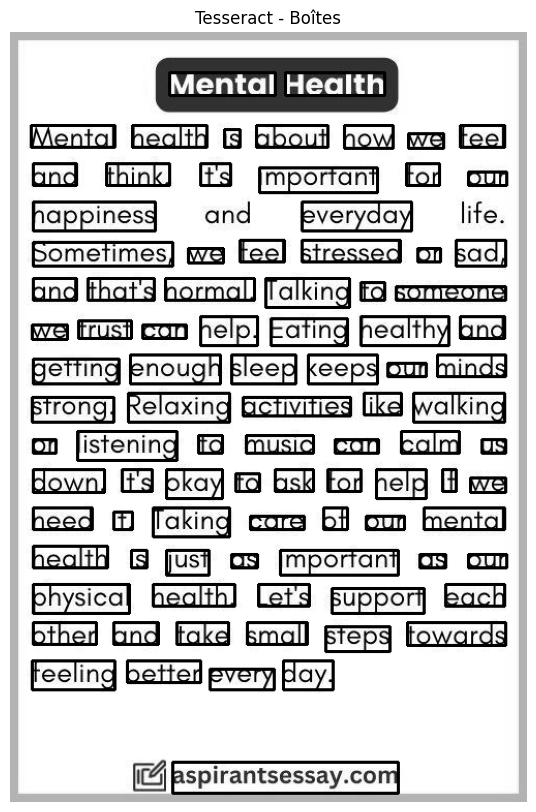

 

The Tell-Tale Heart

IRUE! nervous, very, very dreadfully nervous
NY 4 I had been and am; but why will you say

\\ that I am mad? The disease had sharp-
ened my senses, not destroyed, not dulled them. Above
all was the sense of hearing acute. I heard all things
in the heaven and in the earth. I heard many things
in hell. How, then, amI mad? Hearken! and ob-
serve how healthily, how calmly I can tell you the
whole story.

Tt is impossibie to say how first the idea entered my
brain; but, once conceived, it haunted me day and
night. Object there was none. Passion there was
none. I loved the old man. He had never wronged
me. He had never given me insult. For his gold I
had no desire. I think it was his eye! yes, it was this!
One of his eyes resembled that of a vulture, a pale
blue eye, with a film over it. Whenever it fell upon
me, my-blood ran cold; and so by degrees, very
gradually, I made up my mind to take the life of the
old man, and thus rid myself of the eye forever.

106

‘f.



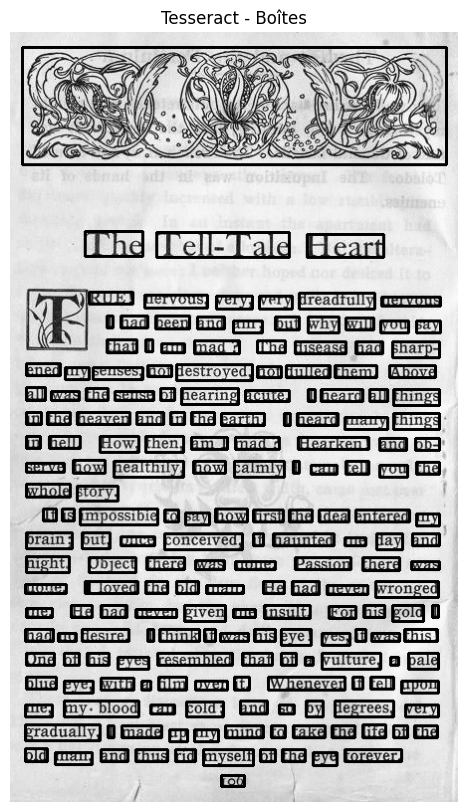

THE
NIGHT
OCEAN

 

 



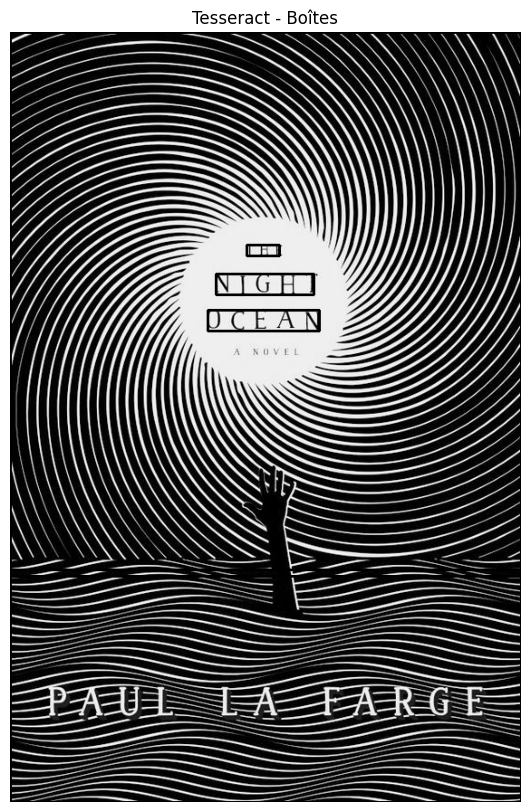

Pa
pine
Se



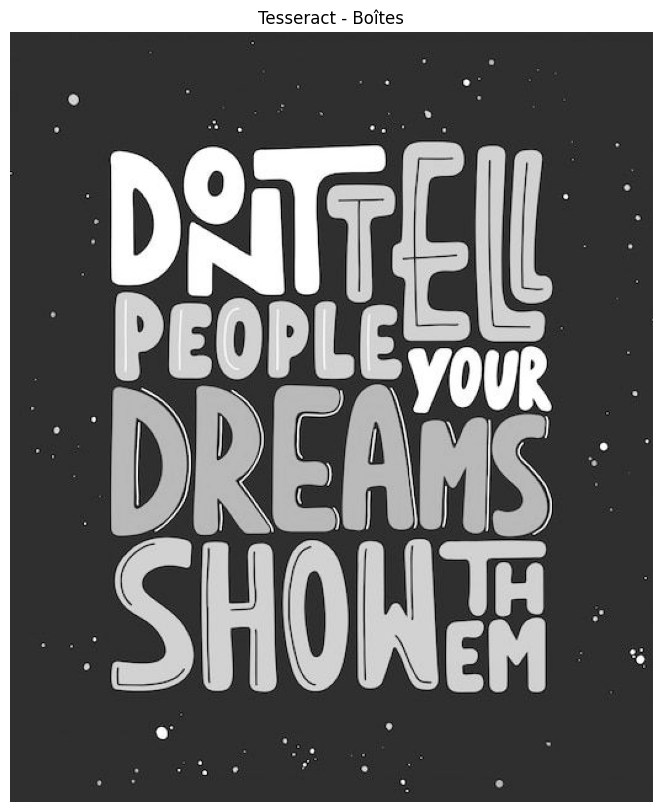

In [28]:
random_images_normal = random.sample(all_images_normal, 2)
random_images_exotic = random.sample(all_images_exotic, 2)

def process_image_tesseract(image_path):
  img = cv2.imread(img_path)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #_, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  text = pytesseract.image_to_string(img_gray)
  print(text)

  boxes = pytesseract.image_to_data(img_gray, output_type=pytesseract.Output.DICT)

  for i in range(len(boxes['text'])):
      if int(boxes['conf'][i]) > 60:
          (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])
          cv2.rectangle(img_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title("Tesseract - Boîtes")
  plt.show()

for img_path_ in random_images_normal:
  img_path = os.path.join(data_path_normal, img_path_)
  process_image_tesseract(img_path)

for img_path_ in random_images_exotic:
  img_path = os.path.join(data_path_exotic, img_path_)
  process_image_tesseract(img_path)


## Easy OCR

PREMADE SERIES
BOOK
1
THE
LOST
GODS
TRIF PREMADE
W WW.T RIF B 0 0 K D E S I G N. € 0 M


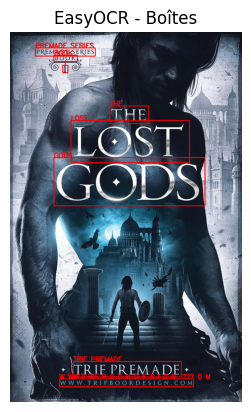

be
dark
pines
DEAN
deafening .
WILL
can
silence
Sometimes


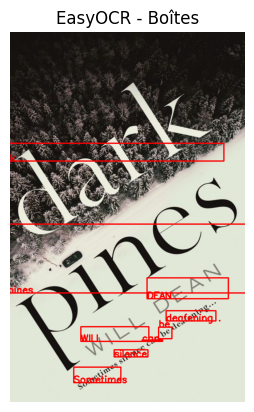

If you want new
ideas, read old
books.


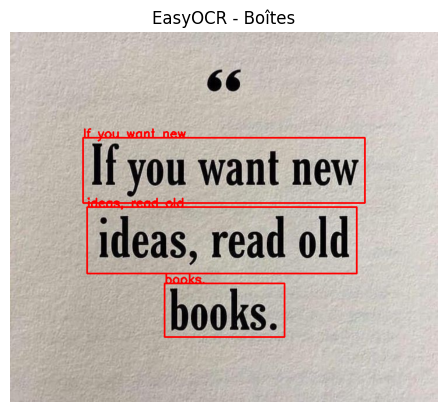

The Tell-Tale Heart
IRUE!
nervous, very, very dreadfully nervous
I had been and am;
but why will you say
that
am
mad ?
The disease had sharp-
ened my senses_
not destroyed, not dulled them.
Above
all
was the
sense of
hearing acute:
I heard all
things
in the heaven and in the earth:
I heard
things
in hell.
How,
am
mad ?
Hearken !
and ob-
serve
healthily,
how calmly I
can
tell
you the
whole story.
It is impossibie to say how first the idea entered my
brain; but;
once
conceived, it
haunted
me
and
night
Object there
was
none_
Passion
there
was
none_
I loved the old
man.
He had never wronged
me_
He had
never given
me insult_
For his gold
had no desire.
I think it was his eye
yes, it was this!
Jne of his eyes resembled that of
vulture,
blue eye,
with
a film over it:
Whenever it fell upon
me,
my. blood
ran   cold;
and
by   degrees,
gradually,
made up my mind to take the life of the
old man, and thus rid myself of the eye forever:
1og
many
then,
how
day
pale
very


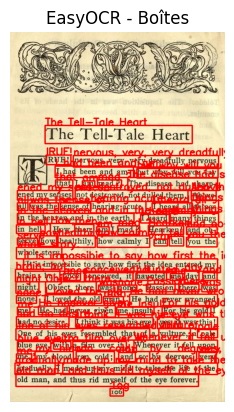

In [29]:
random_images_normal = random.sample(all_images_normal, 2)
random_images_exotic = random.sample(all_images_exotic, 2)

def process_easyocr(image_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    reader = easyocr.Reader(['en'])
    result = reader.readtext(img_rgb)

    # Text
    for detection in result:
        print(detection[1])

    # print bbox
    for (bbox, text, conf) in result:
        pt1 = tuple([int(val) for val in bbox[0]])
        pt2 = tuple([int(val) for val in bbox[2]])
        cv2.rectangle(img_rgb, pt1, pt2, (255, 0, 0), 2)
        cv2.putText(img_rgb, text, pt1, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

    plt.figure()
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("EasyOCR - Boîtes")
    plt.show()

for img_path_ in random_images_exotic:
    img_path = os.path.join(data_path_exotic, img_path_)
    process_easyocr(img_path)

for img_path_ in random_images_normal:
    img_path = os.path.join(data_path_normal, img_path_)
    process_easyocr(img_path)